# Business Analitycs - Churn de clientes

<img src="https://images.unsplash.com/photo-1488043592575-e52654c070a7?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80" width=400 />


O churn é uma métrica que mede a rotatividade de clientes do negócio isso está relacionado com os índices de evasão dos clientes e cancelamento dos serviços do negócio. O churn pode ocorrer de diversas maneiras diferentes e identificando os motivos que fizeram o seu cliente cancelar os seus serviços cria-se a oportuidade de criar estratégias de retenção desses cliente.

O foco desse notebook é usar dados passados para entendermos quais foram os motivos que fizeram o cliente cancelar os serviços dessa empresa, iremos utilizar de algumas técnicas de business analytics para tal e com esse estudo sobre esse caso será possível entender os motivos do churn e podemos levar aos tomadores de decisões informações valiosas sobre o negócio baseado em dados reais. 

## Dados

Os dados foram obtidos atráves do site [Kaggle](www.kaggle.com). O conjunto de dados utilizados nesse estudo contém detalhes dos clientes de um banco e o churn se refere o fato de o cliente ter saído do banco, cancelou a sua conta, ou continua sendo cliente do banco.

### Descrição das variáveis

Essa seção se refere aos nomes e descrições das variáveis encontradas no conjunto de dados.

* Surname : Sobrenome do cliente
* CreditScore : O score de crédito do cliente
* Geography : O país do cliente
* Gender : O sexo do cliente
* Age : A idade do cliente
* Tenure : Número que é referente à quantidade de anos que a pessoa é cliente no banco
* Balance : O saldo da conta do cliente
* NumOfProducts : Número de producos bancários que o cliente utiliza
* HasCrCard : O cliente possui cartão de crédito, sendo 0 igual a não e 1 igual a sim.
* IsActiveMember : O cliente possui uma empresa ativa, sendo 0 igual a não e 1 igual a sim.
* EstimatedSalary : O valor do salário estimado do cliente
* Exited : Variável alvo, representa se o cliente cancelou ou não a conta, sendo 0 igual a não e 1 igual a sim.

## Definição do objetivo

O objetivo desse projeto é investigar as causas que fazem os clientes cancelarem as suas contas no banco. Para tal, iremos estudar o nosso conjunto de dados e respondendo a grande questão:

1. Quais são os motivos mais importantes e que são decisivos para os clientes cancelarem as suas contas?

Ao decorrer do processos iremos discutir sobre esses motivos.

## Preparando os dados

In [1]:
# import das bibliotecas utilizadas no projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

In [2]:
# carregando os dados
df = pd.read_csv('data.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Iniciando o estudo

Vamos começar a estudar os nosso dados e retirar insights sobre o churn da empresa.

O esquema do estudo adiante será da seguinte forma:
1. Primeiro vamos ter o código escrito;
2. Segundo descrever o que foi extraído dos dados;

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


O comando acima mostra informações sobre os nossos dados, com isso temos que:
* A média do score dos clientes é de 650;
* A média de idade dos clientes é de aproximadamente 39 anos, sendo que existe um cliente com 92 anos de idade;
* A média do saldo em conta dos clientes é de \\$76485,89; 
* A média do valor estimado do salário dos cliente é de \\$100090.24;
* Temos 10000 registros no conjunto de dados;

In [5]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

O resultado acima nós mostra a quantidade de clientes que cancelaram a conta e também os que não cancelaram a conta. Portanto temos que, para esse conjunto de dados, 7963 clientes de 10000 ainda são clientes do banco e 2037 clientes foram os clientes que cancelaram a conta do banco.

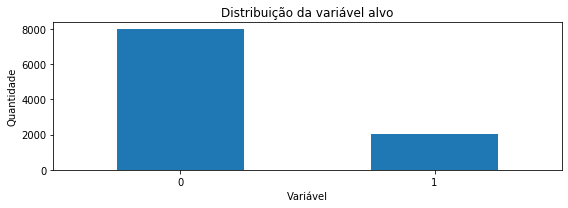

In [6]:
fig, ax = plt.subplots(figsize = (8,3))

df['Exited'].value_counts().plot(kind='bar', ax = ax)
ax.set_title('Distribuição da variável alvo')
ax.set_xlabel('Variável')
ax.set_ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()

Temos a mesma visão do que foi escrito acima, mas agora de forma gráfica em um gráfico de barras, evidenciando que existe mais dados referentes aos clientes que continuam sendo clientes do banco.

In [7]:
gender_exited = pd.crosstab(index=df["Exited"], 
             columns=df["Gender"])

gender_exited.index= ["Cliente","Deixou de ser cliente"]
gender_exited

Gender,Female,Male
Cliente,3404,4559
Deixou de ser cliente,1139,898


A tabela de frequência acima nos mostra a quantidade de clientes do banco por genêro e se o cliente deixou ou não de ser cliente. 

Analisando a tabela temos que a maioria dos clientes que deixaram de ser cliente são do sexo Feminino.

In [8]:
geo_exited = pd.crosstab(index=df["Exited"], 
             columns=df["Geography"])

geo_exited.index= ["Cliente","Deixou de ser cliente"]
geo_exited

Geography,France,Germany,Spain
Cliente,4204,1695,2064
Deixou de ser cliente,810,814,413


A tabela de frequência acima nos mostra a quantidade de clientes do banco por país e se o cliente deixou ou não de ser cliente.

A tabela nos mostra que há dois países com grande quantidade de clientes que deixaram o banco, sendo eles França e Alemanha.

In [9]:
card_exited = pd.crosstab(index=df["Exited"], 
             columns=df["HasCrCard"])

card_exited.index= ["Cliente","Deixou de ser cliente"]
card_exited

HasCrCard,0,1
Cliente,2332,5631
Deixou de ser cliente,613,1424


A tabela de frequência acima nos mostra a quantidade de clientes do banco que possui ou não cartão de crédito e se ele deixou ou não de ser cliente.

A tabela nos mostra que os cliente que possuem cartão de crédito são a maioria que deixaram de ser clientes do banco.

In [10]:
prods_exited = pd.crosstab(index=df["Exited"], 
             columns=df["NumOfProducts"])

prods_exited.index= ["Cliente","Deixou de ser cliente"]
prods_exited

NumOfProducts,1,2,3,4
Cliente,3675,4242,46,0
Deixou de ser cliente,1409,348,220,60


A tabela de frequência acima nos mostra a quantidade de clientes do banco e a quantidade de produtos possíveis do banco e se ele deixou ou não de ser cliente.

A tabela indica que a os clientes que deixaram o banco são os clientes que tinham somente um produto do banco.

In [11]:
ten_exited = pd.crosstab(index=df["Exited"], 
             columns=df["Tenure"])

ten_exited.index= ["Cliente","Deixou de ser cliente"]
ten_exited

Tenure,0,1,2,3,4,5,6,7,8,9,10
Cliente,318,803,847,796,786,803,771,851,828,771,389
Deixou de ser cliente,95,232,201,213,203,209,196,177,197,213,101


A tabela de frequência nos mostra a quantidade de cliente e a quantidade de anos que ele é cliente do banco e se ele deixou ou não de ser cliente.

A tabela nos mostra uma concentração maior de clientes que deixaram de ser clientes entre 1 e 5 anos fazendo parte do banco, mas também temos uma quantidade de clientes com 9 anos de casa deixando de cliente.

In [12]:
active_exited = pd.crosstab(index=df["Exited"], 
             columns=df["IsActiveMember"])

active_exited.index= ["Cliente","Deixou de ser cliente"]
active_exited

IsActiveMember,0,1
Cliente,3547,4416
Deixou de ser cliente,1302,735


A tabela de frequência acima nos mostra a quantidade de clientes do banco que tem ou não empresa ativa no banco e se ele deixou ou não de ser cliente.

A tabela nos mostra que os cliente que não possuem empresa são a maioria que deixaram de ser clientes do banco.

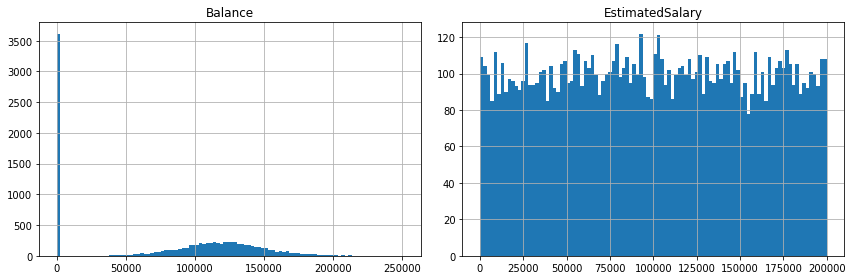

In [13]:
df[['Balance', 'EstimatedSalary']].hist(bins = 100, figsize= (12,4))
plt.tight_layout()

Nos histogramas acima percebemos que existe uma grande quantidade de clientes que estão com saldo em conta igual a 0, será importante dar uma olhada mais afundo sobre esses clientes.

Vou considerar aqui que a estimativa de salário dos clientes sejam anual. O histograma nos mostra que temos dados multimodais, pois há presença de mais de um pico. Poderemos criar grupos para agrupar os clientes com os salários para uma melhor visualização.

In [14]:
df_balance = df.loc[df['Balance']==0]
df_balance['Exited'].value_counts()

0    3117
1     500
Name: Exited, dtype: int64

Como dito anteriormente, se fez necessário olhar mais de perto os clientes que tem 0 no saldo da conta, com isso fiz a tabela acima para ver a quantidade de clientes com saldo 0 para a variável alvo. Vemos que a grande maioria dos clientes que tem saldo igual a zero ainda são clientes do banco e somente 500 clientes deixaram o banco.

In [15]:
df['group_salary'] = df.EstimatedSalary.apply(lambda x: 'group1' if x <= 50000 
                                              else ('group2' if x >= 50001 and x <= 100000
                                                   else ('group3' if x>= 100001 and x<= 150000 else 'group4')))

In [16]:
salary_exited = pd.crosstab(index=df["Exited"], 
             columns=df["group_salary"])

salary_exited.index= ["Cliente","Deixou de ser cliente"]
salary_exited

group_salary,group1,group2,group3,group4
Cliente,1964,2033,2038,1928
Deixou de ser cliente,489,504,517,527


Para uma melhor análise dos salários foi definido quatro grupos, sendo eles:
- O grupo um serão os cliente que tenham estimativa de salários de até \\$50.000,00 anual.
- O grupo dois serão os cliente que tenham estimativa de salários de entre \\$50.000,00 e \\$100.000,00 anual.
- O grupo três serão os cliente que tenham estimativa de salários de entre \\$100.000,00 e \\$150.000,00 anual.
- O grupo quatro serão os cliente que tenham estimativa de salários de maior que \\$150.000,00 anual.

A partir disso temos o seguinte, a maioria dos clientes do que estão no grupo três e os clientes que deixaram de ser clientes estão no grupo quatro. O banco tem menos clientes ativos nesse grupo também, em comparação com os outros grupos.

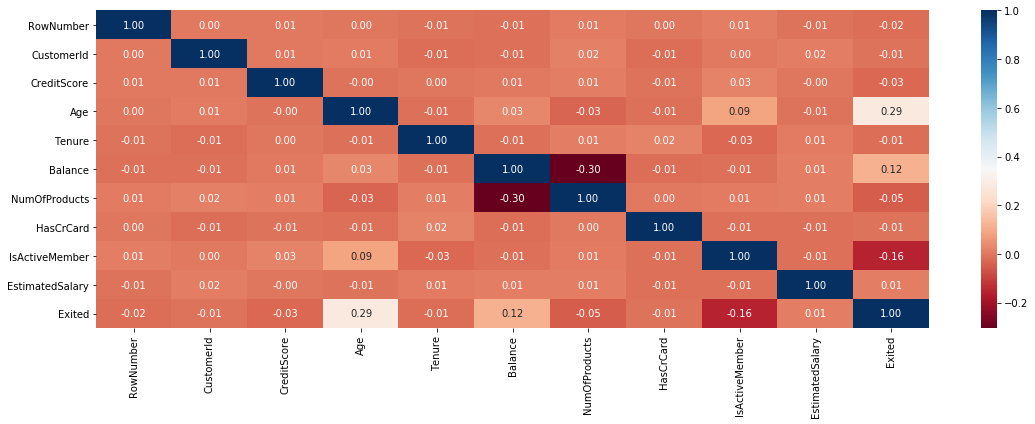

In [17]:
fig, ax = plt.subplots(figsize = (16,6))

sns.heatmap(df.corr(), cmap='RdBu', fmt='.2f',  linecolor='white', annot=True)
plt.tight_layout()

O gráfico acima mostra as correlações entre as variáveis. A maioria das correlações são bem fracas entre as variáveis.
Podemos ver uma correlação entre as variáveis o saldo da conta corrente e o número de produtos. Interessante ver que existe uma correlação, mesmo que sendo fraca, entre a idade e a variável alvo.

In [18]:
num_scores_exited = df.groupby('Exited')[['Age', 'Balance', 'EstimatedSalary', 'CreditScore']].agg('mean')
num_scores_exited.index= ["Cliente","Deixou de ser cliente"]
num_scores_exited

,Age,Balance,EstimatedSalary,CreditScore
Cliente,37.408389,72745.296779,99738.391772,651.853196
Deixou de ser cliente,44.837997,91108.539337,101465.677531,645.351497


A tabela é exibido a média entre algumas variáveis para cada uma variável alvo. Portanto, podemos perceber que os clientes que tenham, em média, idade acima de 44 anos, saldo em conta acima de \\$90.000,00, salário anual acima de \\$100.000,00 e um score de crédito de 645 são clientes que tem probabilidade de deixarem de ser clientes do banco.

## Algoritmo de machine learning

Vamos utilizar de algoritmos de machine learning para auxiliar na resolução do nosso problema. Sabemos que se trata de um problema de classificação, portanto vamos utilizar os algoritmos com essa finalidade.

In [19]:
df = pd.read_csv('data.csv')
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)

vars_numerical = X.select_dtypes(include=['int64', 'float64']).columns
vars_categorical = list(X.select_dtypes(include=['object', 'bool']).columns)

y = df.Exited.values

Os códigos acima redefine o nosso conjunto de dados para o original. Selecionamos os nosso dados para o X e o y, onde o X serão todas as variáveis retirando a variável alvo e também o RowNumber, CustomerId e Surname, que são dados irrelevantes, já que são códigos sequenciais.

É dividido também entre númericas e categóricas, pois será necessário algumas transformações para esses tipos.

### Pré processamento

In [20]:
scaler = StandardScaler()
X[vars_numerical] = scaler.fit_transform(X[vars_numerical])

Para as variáveis númericas será aplicada a transformação StandardScaler. Alguns algoritmos esperam que os dados estejam padronizados, para isso vamos aplicar essa transformação.

A padronização é uma re-escala dos dados númericos dentro de uma faixa, e a função StandardScaler faz isso para gente. Essa técina transforma o dado para forma com média próxima de zero e um desvião padrão próximo de um, normalizandos esses dados.

In [21]:
encoder = ce.OrdinalEncoder(cols = X[vars_categorical])
X = encoder.fit_transform(X)

Seguindo a mesma técnica de aplicar transformação dos dados, vamos para as variáveis categóricas. Os algoritmos esperam que os dados sejam números e não nominais ou ordinais, assim se faz necessário transformar esses dados.

O OneHotEnconding se encarrega de transformar esses dados de categóricos para numéricos, mas de uma forma diferente. Para cada valor de uma variável ele irá criar uma nova coluna e para cada dessa coluna ele cria um binário.

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True)

In [23]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((7000, 10), (7000,), (3000, 10), (3000,))

É de suma importância dividir os dados em dados de treino e validação. Para que o algoritmo treine com os dados de treino e que possamos validar o modelo criado nos dados de validação.

Com isso vamos dividir os dados, sendo para os dados de treino 70% e para os dados de validação 30%.

### Regressão Logística

Vamos estimar uma regressão logística e analisar os resultados estatístico usando statsmodels aqui no Python. Vamos investigar a chance do cliente deixar de ser clientes para as variáveis:

* CreditScore : O score de crédito do cliente
* Geography : O país do cliente
* Gender : O sexo do cliente
* Age : A idade do cliente
* Tenure : Número que é referente à quantidade de anos que a pessoa é cliente no banco
* Balance : O saldo da conta do cliente
* NumOfProducts : Número de producos bancários que o cliente utiliza
* HasCrCard : O cliente possui cartão de crédito, sendo 0 igual a não e 1 igual a sim.
* IsActiveMember : O cliente possui uma empresa ativa, sendo 0 igual a não e 1 igual a sim.
* EstimatedSalary : O valor do salário estimado do cliente

Para esse modelo, por enquanto, não será utilizado os dados transformados, retiramos as variáveis RowNumber, CustomerID e Surname.

In [24]:
model_logic = smf.glm(formula = 'Exited ~  CreditScore + Geography + Gender + Age + Tenure + Balance + NumOfProducts + HasCrCard +IsActiveMember + EstimatedSalary', data = df, family = sm.families.Binomial())
results = model_logic.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Exited   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4280.7
Date:                Fri, 03 Jul 2020   Deviance:                       8561.4
Time:                        22:02:02   Pearson chi2:                 1.01e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.3923 

Para um intervalo de confiança de 95%, temos que alguns coeficientes não foram estaticamente significativos, poderiam ser removidos do modelo. Esses coeficientes podem ser intepretados em termos de aumento ou diminuição da chance do cliente deixarem ou não de ser cliente, pois estão em escala logarítmica.

Interpretando alguns dados temos que, os clientes do sexo Male possuem menos chances de deixarem de ser clientes do que do sexo Feminino. Os clientes que são mais velhos tem mais chances de deixarem de ser clientes do banco. Quanto mais tempo sendo cliente do banco menor serão as chances do cliente deixar de ter conta no banco. Os clientes da Alemanha são os que tem mais chances de deixarem de ser cliente do banco.

Temos que para esse modelo algumas variáveis importantes, sendo elas **Geography, Gender, Age, Balance e IsActiveMember**.

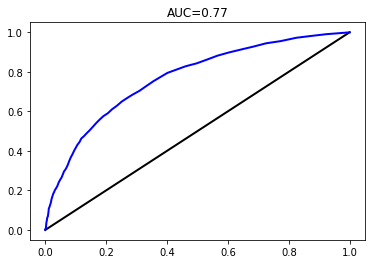

In [25]:
y_preds = results.predict(df)

## Calcular a especificidade e a sensibilidade
S = np.linspace(min(y_preds), max(y_preds), 100)
Sens = np.zeros(len(S), dtype=np.float64)
Spec = np.zeros(len(S), dtype=np.float64)
i1 = np.flatnonzero(df['Exited'] == 1)
i0 = np.flatnonzero(df['Exited'] == 0)
for i,s in enumerate(S):
    Sens[i] = np.mean(y_preds[i1] > s)
    Spec[i] = np.mean(y_preds[i0] <= s)
    
# Calcular a AUC
auc = 0.
for i in range(1,len(Sens)):
    auc += (Spec[i]-Spec[i-1]) * (Sens[i] + Sens[i-1])/2
    
#plotar a  ROC curve
plt.clf()
plt.plot([0,1], [0,1], '-', color='black', lw=2)
plt.plot(1-Spec, Sens, '-', color='blue', lw=2)
plt.title("AUC=%.2f" % auc)
plt.show()

Para validar o modelo vamos utilizar a ROC curve, o código acima é feito o cálculo da sensibilidade e especificidade para que possamos fazer o cálculo da AUC e plotar a curva ROC. A curva ROC é uma forma de representar a relação entre a sensibilidade e a especificidade, podemos interpretar que quanto mais perto do lado superior esquerdo do gráfico melhor é o poder da regressão com os dados. Alcançamos uma escala de 0.77, que é __aceitável__.

### Random Forest Classifier

In [26]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 42)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
features_labels = X_train.columns
features_importance = []
for feature in zip(features_labels, rf.feature_importances_):
    features_importance.append(feature)
    
df_features = pd.DataFrame(features_importance, columns = ['Feature Name', 'Score'])

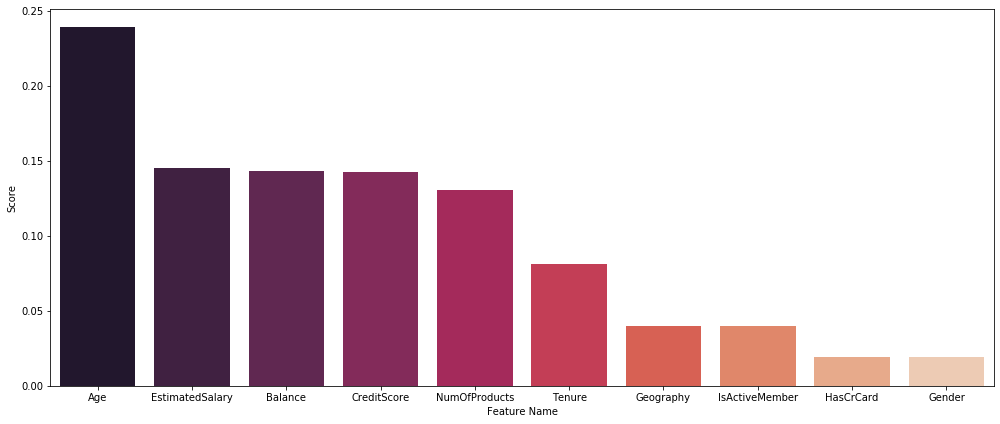

In [32]:
fig, ax = plt.subplots(figsize = [14,6])
sns.barplot(x = 'Feature Name', y = 'Score' , data = df_features.sort_values(by='Score', ascending = False), palette='rocket')

plt.tight_layout()

Para comparar com a Regressão Logística usaremos o Random Forest Classifier, que é um algoritmo baseado em árvores. Para tal, o modelo, de acordo com o gráfico acima, tivemos que as variáveis importantes foram: **Age, EstimatedSalary, Balance e CreditScore**

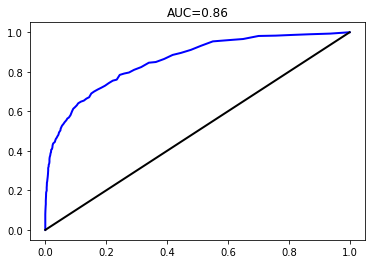

In [29]:
scores = rf.predict_proba(X_valid)[:,1]
fpr, tpr, thresholds = roc_curve(y_valid, scores)

roc_auc = roc_auc_score(y_valid, scores)
plt.plot(fpr, tpr, '-', color='blue', lw=2)
plt.plot([0,1], [0,1], '-', color='black', lw=2)
plt.title("AUC=%.2f" % roc_auc)
plt.show()

Para validarmos o modelo, vamos utilizar os dados de validação, aquele que o algoritmo não teve contato, para assim plotar um gráfico da ROC curve. Alcançamos uma escala de 0.86, que é um valor definido como bom. 

## Conclusão

Fizemos uma longa análise do nosso problema, desde o entendimentos dos dados com a análise exploratória dos dados, onde tivemos alguns insights interessantes até a utilização de algoritmos para auxiliar na resolução do problema e agora podemos voltar na pergunta de negócio, definida anteriormente, e asso, podemos responder com mais convicção e baseado nos dados.

1. Quais são os motivos mais importantes e que são decisivos para os clientes cancelarem as suas contas?

Fizemos dois modelos, onde os dois tiveram resultados um pouco diferente, qual está certo? Os dois estão certos, ainda há um grande trabalho a ser feito, mas podemos responder à essa pergunta com:

**R. A idade é de fato uma variável decisiva, o saldo em conta também tem uma importância. Outros resultados foram interessante levar em conta que a localização, gênero, score do cartão de crédito e empresa ativa também devem ser levadas em conta. Essas são os motivos mais decisivos que levam os clientes a cancelarem as contas.**

Todo o trabalho foi feito pautado em dados, portanto pode ser que seja necessário a aquisição de mais dados, criação de mais variáveis e trabalhar melhor com as transformações, aqui o estudo foi feito com intuito de rapidamente entregar um resultado que irá trazer benefício ao banco.